<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/TheThematics/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Thematic map

Last session we created a file with several layers:

In [88]:
import geopandas as gpd

linkGit='https://github.com/a20202124/PC1_Chinchay_David/raw/refs/heads/main/'
linkWorldMaps='worldMaps.gpkg'

we can easily find out the layers in that geopackage file (**worldMaps.gpkg**):

In [89]:
gpd.list_layers(linkGit+linkWorldMaps)

,name,geometry_type
0,rivers,MultiLineString
1,cities,Point
2,countries,MultiPolygon


For the thematics we will retrieve only one layer (map):

In [90]:
countries=gpd.read_file(linkGit+linkWorldMaps,layer='countries')

# see some
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
3,Algeria,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [91]:
import pandas as pd

someDataLink='Death_rate.csv'

someData=pd.read_csv(linkGit+someDataLink)

## data available
someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 229 non-null    object 
 1   slug                 229 non-null    object 
 2    deaths/1            229 non-null    float64
 3   000 population       229 non-null    int64  
 4   date_of_information  229 non-null    int64  
 5   ranking              229 non-null    object 
 6   region               0 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 12.7+ KB


## Pre Processing: Merging

The DF has some interesting numerical data (_float64_):
* fragility: fragility index 2023 -[details here](https://fragilestatesindex.org/2023/06/14/fragile-states-index-2023-annual-report/)
* co2: metric tonnes of CO2 emmitted -[details here](https://www.cia.gov/the-world-factbook/field/carbon-dioxide-emissions/country-comparison/)
* sq_km: country area -[details here](https://www.cia.gov/the-world-factbook/field/area/country-comparison/)
* num_airports: count of airports in the country -[details here](https://www.cia.gov/the-world-factbook/field/airports/country-comparison/)
* population: country population  -[details here](https://www.cia.gov/the-world-factbook/field/population/country-comparison/)
* mobiles: total number of mobile cellular telephone subscribers -[details here](https://www.cia.gov/the-world-factbook/field/telephones-mobile-cellular/country-comparison/)

There are also other columns that may be of help:

In [92]:
someData.head()

,name,slug,deaths/1,000 population,date_of_information,ranking,region
0,Ukraine,ukraine,18.6,2024,1,Europe,NaN
1,Lithuania,lithuania,15.2,2024,2,Europe,NaN
2,Serbia,serbia,14.9,2024,3,Europe,NaN
3,Latvia,latvia,14.7,2024,4,Europe,NaN
4,Romania,romania,14.6,2024,5,Europe,NaN


Preparing thematic maps requires **social data** _about_ the geometry (line, polygon, point). The object **countries** has no social data, so the preprocessing requires geomerging.

### Geo Merging

This is a critical preprocessing operation, as it is in charge of combining data sets, in this case combine a DF into a GDF. Some rules are needed:

* There is at least one common column needed to serve for the matches.
* The common columns, or KEYs, need contents to be written exactly in both columns.
* It is recommended that both KEYs are named the same.

Here we have the KEYs:

In [93]:
countries.COUNTRY.head()

0    Aruba (Netherlands)
1    Antigua and Barbuda
2            Afghanistan
3                Algeria
4             Azerbaijan
Name: COUNTRY, dtype: object

In [94]:
someData.name.head()

0      Ukraine
1    Lithuania
2       Serbia
3       Latvia
4      Romania
Name: name, dtype: object

Let's solve the _country name_ differences for the KEYs:

In [95]:
countries.rename(columns={'COUNTRY':'name'},inplace=True)

We can notice the different *case* in the KEYs. Let's work with uppercases:

It is very unlikely the names are written the same. Let's verify:

In [96]:
onlyDF=set(someData.name)- set(countries.name)
onlyGDF=set(countries.name)- set(someData.name)

Check here:

In [97]:
onlyDF # they did not find a match in the MAP GDF!

{'American Samoa',
 'Anguilla',
 'Aruba',
 'Bahamas, The',
 'Bermuda',
 'British Virgin Islands',
 'Burma',
 'Cabo Verde',
 'Cayman Islands',
 'Cocos (Keeling) Islands',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Cook Islands',
 "Cote d'Ivoire",
 'Curacao',
 'Czechia',
 'Eswatini',
 'Falkland Islands (Islas Malvinas)',
 'Faroe Islands',
 'French Polynesia',
 'Gambia, The',
 'Gaza Strip',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Guernsey',
 'Hong Kong',
 'Isle of Man',
 'Jersey',
 'Korea, North',
 'Korea, South',
 'Kosovo',
 'Macau',
 'Micronesia, Federated States of',
 'Montserrat',
 'New Caledonia',
 'North Macedonia',
 'Northern Mariana Islands',
 'Palau',
 'Puerto Rico',
 'Saint Barthelemy',
 'Saint Helena, Ascension, and Tristan da Cunha',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Martin',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Sint Maarten',
 'Timor-Leste',
 'Turkey (Turkiye)',
 'Turks and Caicos Islands',
 'Vir

There are several countries in the DF that did not find a match in the GDF (map). Of course, most of them are in the map, let's see why they were not matched.

### Fuzzy merging

We use this technique to detect similarities between strings. You need this package **thefuzz** (based on the [Levenshtein algorithm](https://en.wikipedia.org/wiki/Levenshtein_distance)):

In [161]:
 %pip install --user thefuzz

Note: you may need to restart the kernel to use updated packages.


This is the basic idea:

In [99]:
from thefuzz.process import extractOne as best

## find the BEST match to 'BAHAMAS (THE)'
## from all strings in 'onlyGDF'

best('Finland',onlyGDF)

('Greenland (Denmark)', 71)

As you see, you get a coefficient value of 90 (the closer to 100 the better). That may be a reliable result.

Let's do the same for all the unmatched countries:

In [100]:
## for each country in onlyDF, find the BEST match in onlyGDF

[(name, best(name,onlyGDF)) for name in onlyDF]

[('Hong Kong', ('Congo', 68)),
 ('Gibraltar', ('Gibraltar (UK)', 95)),
 ('Czechia', ('Czech Republic', 75)),
 ('Macau', ('Macedonia', 68)),
 ('Samoa', ('American Samoa (US)', 90)),
 ('French Polynesia', ('French Polynesia (France)', 90)),
 ('Isle of Man', ('Isle of Man (UK)', 95)),
 ('Cabo Verde', ('Cape Verde', 80)),
 ('Gambia, The', ('Gambia', 90)),
 ('Jersey', ('Jersey (UK)', 90)),
 ('Micronesia, Federated States of', ('Federated States of Micronesia', 95)),
 ('Greenland', ('Greenland (Denmark)', 90)),
 ('Montserrat', ('Montserrat (UK)', 95)),
 ('Cayman Islands', ('Cayman Islands (UK)', 95)),
 ('Virgin Islands', ('British Virgin Islands(UK)', 90)),
 ('Gaza Strip', ('Gambia', 54)),
 ('Saint Kitts and Nevis', ('St. Kitts and Nevis', 90)),
 ('Puerto Rico', ('Puerto Rico (US)', 95)),
 ('Saint Martin', ('Antarctica', 64)),
 ('Cocos (Keeling) Islands', ('Cocos (Keeling) Islands (Australia)', 95)),
 ('American Samoa', ('American Samoa (US)', 95)),
 ('Timor-Leste', ('East Timor', 81)),
 ('N

Each element in the *list* above in in parentheses, for instance:

```
('TIMOR-LESTE', ('EAST TIMOR', 81))
```

That element has two elements:


*   **'TIMOR-LESTE'** from *onlyDF*, and
*   **('EAST TIMOR', 81)** which is the result from _best(country,onlyGDF)_. This last element, as we just saw above, shows the best match and the level of similarity (the higher the more similar).

We can prepare a list where each element has three elements:



In [101]:
#or
[(name, best(name,onlyGDF)[0],best(name,onlyGDF)[1]) for name in onlyDF]

[('Hong Kong', 'Congo', 68),
 ('Gibraltar', 'Gibraltar (UK)', 95),
 ('Czechia', 'Czech Republic', 75),
 ('Macau', 'Macedonia', 68),
 ('Samoa', 'American Samoa (US)', 90),
 ('French Polynesia', 'French Polynesia (France)', 90),
 ('Isle of Man', 'Isle of Man (UK)', 95),
 ('Cabo Verde', 'Cape Verde', 80),
 ('Gambia, The', 'Gambia', 90),
 ('Jersey', 'Jersey (UK)', 90),
 ('Micronesia, Federated States of', 'Federated States of Micronesia', 95),
 ('Greenland', 'Greenland (Denmark)', 90),
 ('Montserrat', 'Montserrat (UK)', 95),
 ('Cayman Islands', 'Cayman Islands (UK)', 95),
 ('Virgin Islands', 'British Virgin Islands(UK)', 90),
 ('Gaza Strip', 'Gambia', 54),
 ('Saint Kitts and Nevis', 'St. Kitts and Nevis', 90),
 ('Puerto Rico', 'Puerto Rico (US)', 95),
 ('Saint Martin', 'Antarctica', 64),
 ('Cocos (Keeling) Islands', 'Cocos (Keeling) Islands (Australia)', 95),
 ('American Samoa', 'American Samoa (US)', 95),
 ('Timor-Leste', 'East Timor', 81),
 ('Northern Mariana Islands', 'Northern Mariana 

For instace, this element has 3 elements:

```
 ('IRAN (ISLAMIC REPUBLIC OF)', 'IRAN', 90)
```

The level of similarity would guide us to make update (replace) the strings in one of the KEYs, so that the merging process works properly.

Then, it would be better if we have a data frame instead of a list:

In [102]:
pd.DataFrame([(name, best(name,onlyGDF)[0],best(name,onlyGDF)[1]) for name in onlyDF])

,0,1,2
0,Hong Kong,Congo,68
1,Gibraltar,Gibraltar (UK),95
2,Czechia,Czech Republic,75
3,Macau,Macedonia,68
4,Samoa,American Samoa (US),90
5,French Polynesia,French Polynesia (France),90
6,Isle of Man,Isle of Man (UK),95
7,Cabo Verde,Cape Verde,80
8,"Gambia, The",Gambia,90
9,Jersey,Jersey (UK),90


Let's sort by the column '2' (the third):

In [103]:
pd.DataFrame([(name, best(name,onlyGDF)[0],best(name,onlyGDF)[1]) for name in onlyDF]).sort_values(by=2)

,0,1,2
36,Kosovo,Svalbard (Norway),45
15,Gaza Strip,Gambia,54
53,Saint Barthelemy,Swaziland,55
44,West Bank,Western Sahara,57
42,Burma,Curacao (Netherlands),60
48,Eswatini,Martinique (France),60
39,Sint Maarten,Myanmar,62
47,Cote d'Ivoire,Ivory Coast,63
18,Saint Martin,Antarctica,64
3,Macau,Macedonia,68


The previous result helps make a plan based on these cases:
* **ESWATINI** is always a problem, because it is also *SWAZILAND*.
* **KOREA (THE REPUBLIC OF)** is not _NORTH KOREA_.
* **LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)** is too long to match *LAOS* (if it exists in the map like that).
* **SAMOA** is always a problem, because it is also *WESTERN SAMOA*.

Based on this, we should see what our GDF has:

Then, it makes sense to change those manually (notice the 'replace' uses Python dictionaries):

In [104]:
# Definimos las correcciones manuales como diccionario
manualChanges = {
    # Casos de "false match"
    'KOSOVO': 'KOSOVO',
    'WEST BANK': 'STATE OF PALESTINE',
    'GAZA STRIP': 'STATE OF PALESTINE',
    'SINT MAARTEN': 'SINT MAARTEN (DUTCH PART)',
    'ESWATINI': 'SWAZILAND',
    'MACAU': 'MACAO',
    'BURMA': 'MYANMAR',
    'HONG KONG': 'HONG KONG (SPECIAL ADMINISTRATIVE REGION OF CHINA)',
    'SAINT BARTHELEMY': 'SAINT BARTHELEMY',
    'SAINT LUCIA': 'SAINT LUCIA',
    'SAINT MARTIN': 'SAINT MARTIN (FRENCH PART)',
    'FALKLAND ISLANDS (ISLAS MALVINAS)': 'FALKLAND ISLANDS (ISLAS MALVINAS)',
    'SAINT HELENA, ASCENSION, AND TRISTAN DA CUNHA':
        'SAINT HELENA, ASCENSION AND TRISTAN DA CUNHA',
    'SAINT PIERRE AND MIQUELON': 'SAINT PIERRE AND MIQUELON',

}

countries.replace(
    to_replace={'name': manualChanges},
    inplace=True
)



At this stage, we should recompute the differences:

In [105]:
# updating
onlyDF=set(someData.name)- set(countries.name)
onlyGDF=set(countries.name)- set(someData.name)

An re run this code:

In [106]:
# keeping high scores

pd.DataFrame([(name, best(name,onlyGDF)[0],best(name,onlyGDF)[1]) for name in onlyDF]).sort_values(2)

,0,1,2
36,Kosovo,Svalbard (Norway),45
15,Gaza Strip,Gambia,54
53,Saint Barthelemy,Swaziland,55
44,West Bank,Western Sahara,57
42,Burma,Curacao (Netherlands),60
48,Eswatini,Martinique (France),60
39,Sint Maarten,Myanmar,62
47,Cote d'Ivoire,Ivory Coast,63
18,Saint Martin,Antarctica,64
3,Macau,Macedonia,68


All this is correct now!

Let's prepare the changes:

In [107]:
# new {dictionary}
changesToDF={name: best(name,onlyGDF)[0] for name in onlyDF}
changesToDF

{'Hong Kong': 'Congo',
 'Gibraltar': 'Gibraltar (UK)',
 'Czechia': 'Czech Republic',
 'Macau': 'Macedonia',
 'Samoa': 'American Samoa (US)',
 'French Polynesia': 'French Polynesia (France)',
 'Isle of Man': 'Isle of Man (UK)',
 'Cabo Verde': 'Cape Verde',
 'Gambia, The': 'Gambia',
 'Jersey': 'Jersey (UK)',
 'Micronesia, Federated States of': 'Federated States of Micronesia',
 'Greenland': 'Greenland (Denmark)',
 'Montserrat': 'Montserrat (UK)',
 'Cayman Islands': 'Cayman Islands (UK)',
 'Virgin Islands': 'British Virgin Islands(UK)',
 'Gaza Strip': 'Gambia',
 'Saint Kitts and Nevis': 'St. Kitts and Nevis',
 'Puerto Rico': 'Puerto Rico (US)',
 'Saint Martin': 'Antarctica',
 'Cocos (Keeling) Islands': 'Cocos (Keeling) Islands (Australia)',
 'American Samoa': 'American Samoa (US)',
 'Timor-Leste': 'East Timor',
 'Northern Mariana Islands': 'Northern Mariana Islands (US)',
 'Aruba': 'Aruba (Netherlands)',
 'Korea, South': 'South Korea',
 'Bermuda': 'Bermuda (UK)',
 'Bahamas, The': 'Bahamas

In [108]:
someData.replace(to_replace={'name':changesToDF},inplace=True)

What is left to match?

In [109]:
# updating
onlyDF=set(someData.name)- set(countries.name)
onlyGDF=set(countries.name)- set(someData.name)
[(name, best(name,onlyGDF)) for name in onlyDF]

[]

Once you are here, merging can proceed:

In [110]:
## GDF to the 'left'
theMapAndData=countries.merge(someData, on='name')

And our GDF has social data now!

In [111]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 229 non-null    object  
 1   geometry             229 non-null    geometry
 2   slug                 229 non-null    object  
 3    deaths/1            229 non-null    float64 
 4   000 population       229 non-null    int64   
 5   date_of_information  229 non-null    int64   
 6   ranking              229 non-null    object  
 7   region               0 non-null      float64 
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 14.4+ KB


We should save this map of countries and their indicators in a new file:

In [112]:
theMapAndData.to_file("worldindicators.json")

# Thematics: the DDM (Dot Density Map)

You have a DDM if you use dot to show comparatively which polygon of a map has 'more' (or 'less') of some countable phenomenon of interest.
A dot is an aggregated value, but it is constant for each dot.

We have the world map, let's keep Africa:

In [113]:
theMapAndData.ranking.value_counts()

ranking
Africa                               55
Europe                               49
Central America and the Caribbean    32
Australia and Oceania                21
East and Southeast Asia              20
Middle East                          16
South America                        13
Central Asia                          9
South Asia                            8
North America                         6
Name: count, dtype: int64

### Preprocessing: Filtering

<Axes: >

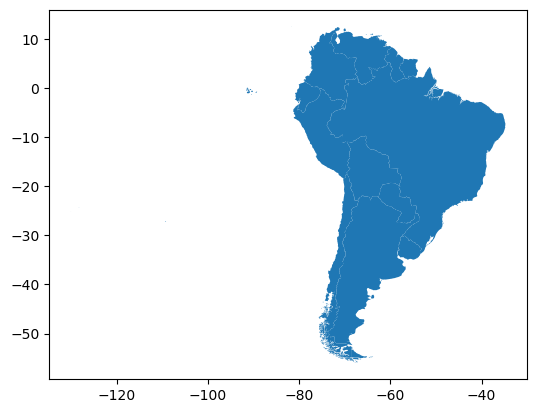

In [114]:
# then

America=theMapAndData[theMapAndData.ranking=='South America']
America.plot()

A DDM can serve as an effective way to show the distribution of people. The most critical tasks are:

* Dot Placement: The dots should be randomly distributed within each polygon to avoid misrepresenting the data.

* Dot Unit: Deciding how many people each dot should represent is key for visual clarity. This value should be chosen carefully to avoid oversaturation or sparsity.

The size of all dots on the map must be the same to ensure a consistent visual comparison.

### Preprocessing: aggregating

This is a DOT UNIT proposal:

In [115]:
justDots=America.copy()
dot_value = 0.1
justDots['num_dots'] = (justDots[' deaths/1'] / dot_value).astype(int)

### Preprocessing: distributing dots

And here, we get a location for the dots:

In [116]:
# 2. Generate the random dot locations using .sample_points()
justDots = justDots.sample_points(size=justDots['num_dots']).explode(index_parts=True)

You get this:

In [117]:
justDots

11   0     POINT (-72.21631 -49.87929)
     1     POINT (-71.43596 -40.35735)
     2     POINT (-71.30681 -51.09084)
     3     POINT (-71.28395 -46.95679)
     4     POINT (-70.93509 -41.47532)
                      ...             
213  60      POINT (-61.63873 7.00369)
     61      POINT (-61.45428 9.18142)
     62      POINT (-61.06868 9.01596)
     63       POINT (-60.7779 5.00154)
     64      POINT (-60.10211 8.54622)
Name: sampled_points, Length: 924, dtype: geometry

In [118]:
# what is it?
type(justDots)

geopandas.geoseries.GeoSeries

### Preprocessing: building GDF from GS

Notice the multi index (MI), one for a country and for a dot. As we are planing to send these points to R, we avoid MI:

In [119]:
justDots.reset_index(drop=True, inplace=True)
America_dots=gpd.GeoDataFrame(geometry=justDots)
America_dots

,geometry
0,POINT (-72.21631 -49.87929)
1,POINT (-71.43596 -40.35735)
2,POINT (-71.30681 -51.09084)
3,POINT (-71.28395 -46.95679)
4,POINT (-70.93509 -41.47532)
...,...
919,POINT (-61.63873 7.00369)
920,POINT (-61.45428 9.18142)
921,POINT (-61.06868 9.01596)
922,POINT (-60.7779 5.00154)


Now you have a GDF:

In [120]:
America_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  924 non-null    geometry
dtypes: geometry(1)
memory usage: 7.3 KB


Juts plot the polygons as the base, and the points as the layer on top!

<Axes: >

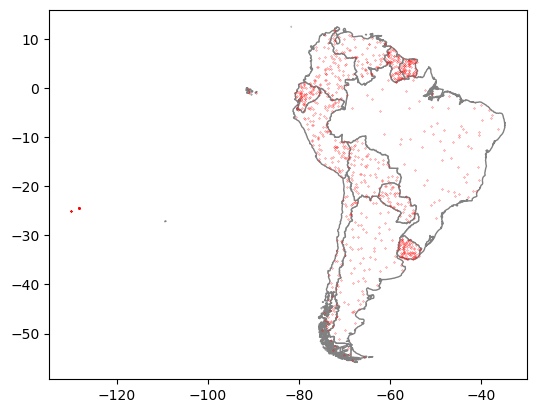

In [121]:
base=America.plot(facecolor="white",#color of polygon fill
               edgecolor='grey') #color of border
America_dots.plot(markersize=0.05, color='red',ax=base)

It is generally recommended that DDMs use an **equal-area projection**, which benefits density and limits area distortion.

<Axes: >

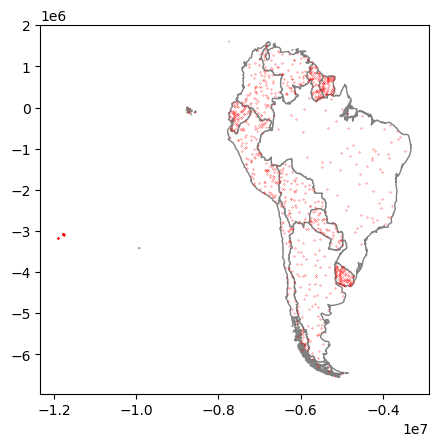

In [122]:
base=America.to_crs(8857).plot(facecolor="white",
                              edgecolor='grey')
America_dots.to_crs(8857).plot(markersize=0.05, color='red',ax=base)

Let's keep the continent countries with that crs:

In [123]:
America_8857=America.to_crs(8857)
America_dots_8857=America_dots.to_crs(8857)

# Thematics: the PSM (Proportional Symbol Map)

You have a PSM if you use a symbol (generally a circle) to show the distribution of a variable per location.
The symbol is an aggregated raw value, and its size varies according to those values. So now we need:

### Preprocessing: GDF of centroids

1. A location for a symbol, generally the polygon centroid.

In [124]:
America_8857_centroids = America_8857.copy()

# Africa_8857_centroids will have a new geometry:
America_8857_centroids['geometry'] = America_8857_centroids['geometry'].centroid

2. A size of varying values (not constant as in DDMs). Let's use population again.

In [125]:
America_8857_centroids['size'] = America_8857_centroids[' deaths/1'].apply(lambda x: (x**0.5) * 20)

## or
# import numpy as np
# Africa_8857_centroids['size'] = Africa_8857_centroids['population'].apply(lambda x: np.log10(x))

We got the basics, then:

<Axes: >

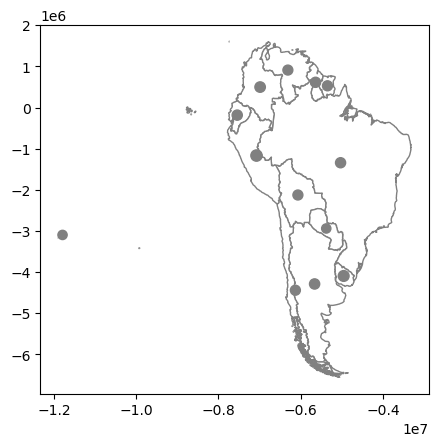

In [126]:
base=America_8857.plot(facecolor="white",
                      edgecolor='grey')
# Plot the centroids on top
America_8857_centroids.plot(
    ax=base,
    markersize=America_8857_centroids['size'],
    color='grey'
)

In [162]:
%pip install --user matplotlib

Note: you may need to restart the kernel to use updated packages.


In [163]:
%pip install --user mapclassify

Note: you may need to restart the kernel to use updated packages.


In [164]:
%pip install --user folium>=0.12" matplotlib mapclassify

Note: you may need to restart the kernel to use updated packages.


Keep in mind that the standard way of computing centroids may bring some trouble. Let´s plot Seychelles:

In [130]:
base=America_8857[America_8857.name=="SEYCHELLES"].explore()
America_8857_centroids[America_8857_centroids.name=="SEYCHELLES"].explore(m=base,color="red")

C:\Users\david\AppData\Local\Temp\ipykernel_28204\1862418379.py:1: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  base=America_8857[America_8857.name=="SEYCHELLES"].explore()
C:\Users\david\AppData\Local\Temp\ipykernel_28204\1862418379.py:2: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  America_8857_centroids[America_8857_centroids.name=="SEYCHELLES"].explore(m=base,color="red")


A good alternative to centroids is representative_point() when dealing with complex multipolygons.

In [131]:
# replace the points
America_8857_centroids["geometry"]=America_8857.representative_point()

We will keep that last result.

In [132]:
base=America_8857[America_8857.name=="SEYCHELLES"].explore()
America_8857_centroids[America_8857_centroids.name=="SEYCHELLES"].explore(m=base,color="red")

C:\Users\david\AppData\Local\Temp\ipykernel_28204\1862418379.py:1: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  base=America_8857[America_8857.name=="SEYCHELLES"].explore()
C:\Users\david\AppData\Local\Temp\ipykernel_28204\1862418379.py:2: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  America_8857_centroids[America_8857_centroids.name=="SEYCHELLES"].explore(m=base,color="red")


### Preprocessing: Computing new columns

PPMs are not thematic maps to see precise values, but to reveal clear differences on the variable distribution used. As, human eyes are very limited to detect area differences, we may need to use some other tactics to help uncover some patterns.

For example, let's confirm if we have outliers:

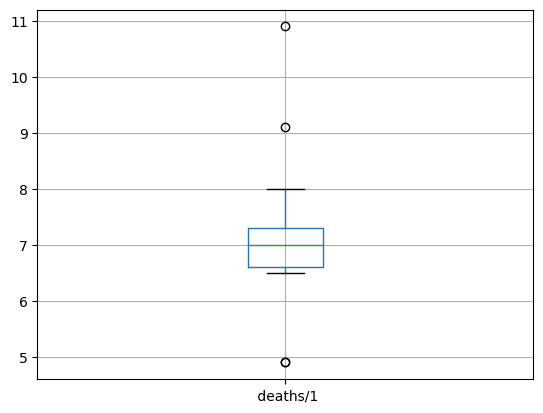

In [133]:
boxplotInfo=America_8857_centroids.boxplot(column=' deaths/1',return_type="dict")

The object **boxplotInfo** showed the boxplot, and we confirm there are outliers. We can recover them like this:

In [134]:
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([4.9, 4.9, 10.9, 9.1], dtype=object)

Then, these are the outlying countries:

In [135]:
America_8857_centroids[America_8857_centroids[' deaths/1'].isin(outliers)]


,name,geometry,slug,deaths/1,000 population,date_of_information,ranking,region,size
154,Paraguay,POINT (-5383797.6 -2964049.838),paraguay,4.9,2024,196,South America,NaN,44.271887
155,Pitcairn Islands (UK),POINT (-11769531.111 -3084092.814),falkland-islands-islas-malvinas,4.9,2012,201,South America,NaN,44.271887
156,Peru,POINT (-7214274.314 -1170745.732),peru,10.9,2024,26,South America,NaN,66.030296
210,Uruguay,POINT (-4944550.554 -4064051.998),uruguay,9.1,2024,57,South America,NaN,60.332413


Knowing this information, we can create a column as outlier flag:

In [136]:
America_8857_centroids['population_outlier']=America_8857_centroids[' deaths/1'].isin(outliers)*1

## see
America_8857_centroids

,name,geometry,slug,deaths/1,000 population,date_of_information,ranking,region,size,population_outlier
11,Argentina,POINT (-5553772.712 -4493827.822),argentina,7.3,2024,107,South America,NaN,54.037024,0
25,Bolivia,POINT (-6065512.507 -2073238.575),bolivia,6.6,2024,130,South America,NaN,51.380930,0
30,Brazil,POINT (-4700709.502 -1764170.762),brazil,7.0,2024,119,South America,NaN,52.915026,0
43,Chile,POINT (-6234313.161 -4304799.911),chile,6.6,2024,133,South America,NaN,51.380930,0
48,Colombia,POINT (-6936232.356 525486.665),colombia,8.0,2024,91,South America,NaN,56.568542,0
60,Ecuador,POINT (-7496744.998 -227636.718),ecuador,7.2,2024,113,South America,NaN,53.665631,0
89,Guyana,POINT (-5636237.099 628135.992),guyana,7.0,2024,122,South America,NaN,52.915026,0
151,Suriname,POINT (-5370305.407 503625.945),suriname,6.7,2024,129,South America,NaN,51.768716,0
154,Paraguay,POINT (-5383797.6 -2964049.838),paraguay,4.9,2024,196,South America,NaN,44.271887,1
155,Pitcairn Islands (UK),POINT (-11769531.111 -3084092.814),falkland-islands-islas-malvinas,4.9,2012,201,South America,NaN,44.271887,1


We can use that like this:

<Axes: >

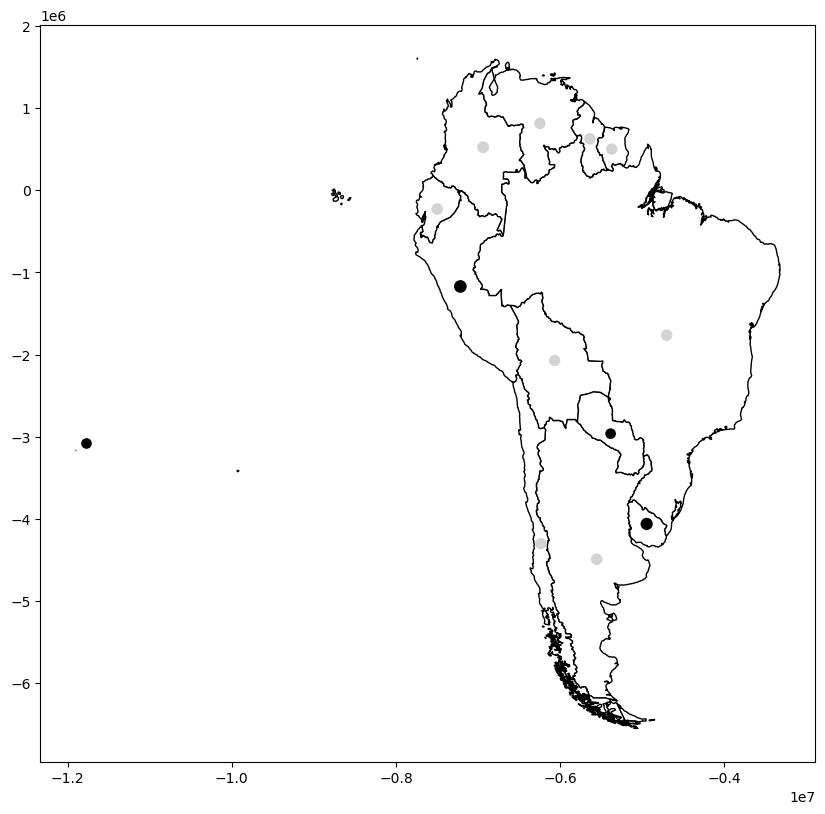

In [137]:
base = America_8857.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'black', 0: 'lightgrey'}

# Plot the centroids on top
America_8857_centroids.plot(
    ax=base,
    markersize=America_8857_centroids['size'],
    color=America_8857_centroids['population_outlier'].map(mapcolor)
)

Here, we do a good job for outliers, but it is difficult to interprete the other ones. We could use some redundancy, but more work is needed:
1. Create two maps of centroids:

In [138]:
# Create explicit copies of the DataFrames
America_8857_centroids_out = America_8857_centroids[America_8857_centroids.population_outlier==1].copy()
America_8857_centroids_no_out = America_8857_centroids[America_8857_centroids.population_outlier==0].copy()


2. Compute sizes in each:

In [139]:
America_8857_centroids_out['size'] = America_8857_centroids_out[' deaths/1'].apply(lambda x: x**0.5*10)
America_8857_centroids_no_out['size'] = America_8857_centroids_no_out[' deaths/1'].apply(lambda x: x**0.5*10)

Now, plot the three layers, using some color gradient for the non-outliers:

<Axes: >

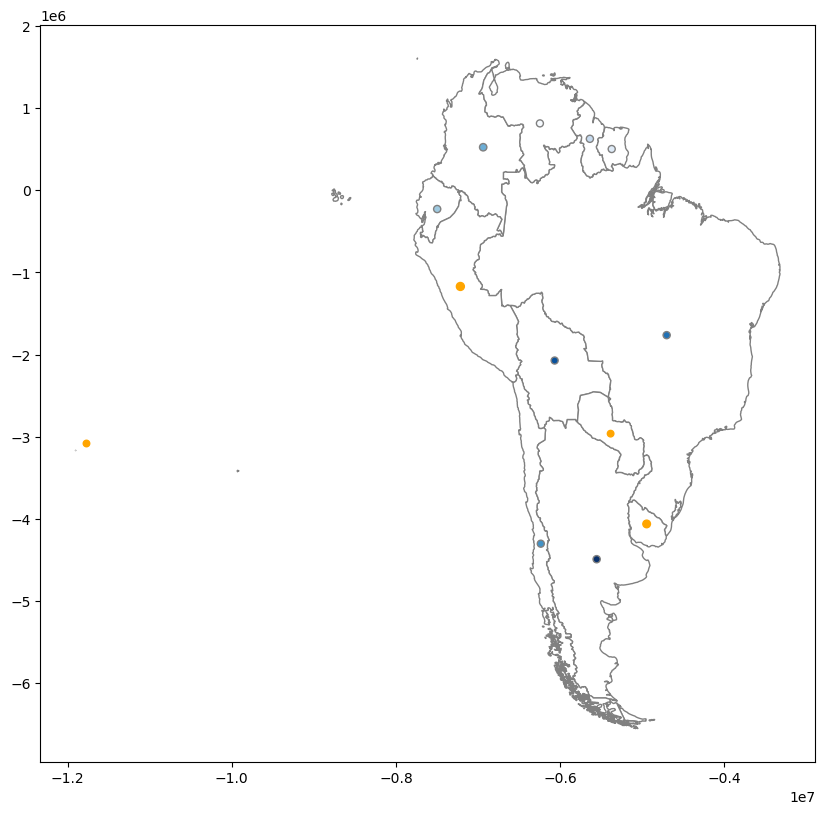

In [140]:
base = America.to_crs(America_8857_centroids_no_out.crs).plot(color='white', edgecolor='grey', figsize=(10,10))


America_8857_centroids_no_out.plot(
    ax=base,
    markersize=America_8857_centroids_no_out['size'],
    edgecolor='grey',
    c=America_8857_centroids_no_out['size'],
    cmap='Blues_r'
)
America_8857_centroids_out.plot(
    ax=base,
    markersize=America_8857_centroids_out['size'],
    color='orange'
)

# Thematics: Choropleths

Notice that the DDMs may use aggregated counts, and the PSMs use the variables in its original form. Choropleths will 'paint' the whole polygon and as noticed in PSMs, we have to be very careful when using color in shape, as the area itself is a confounding. To control this visual artifact, the variable must be normalized, that is, divided by a value correlated with the area.

Then, for this course, a choropleth is a normalized representation of data.

Following our definition:

* This is **NOT** a choropleth:


<Axes: >

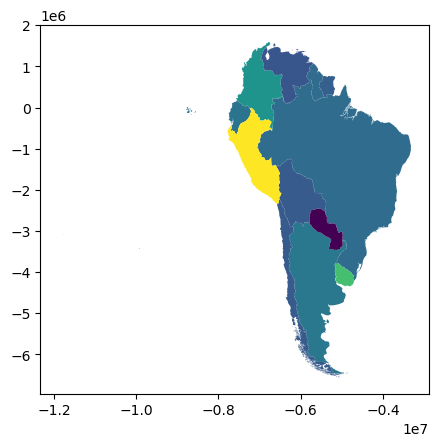

In [141]:
America_8857.plot(America_8857[' deaths/1'])


* This **IS** a choropleth:

<Axes: >

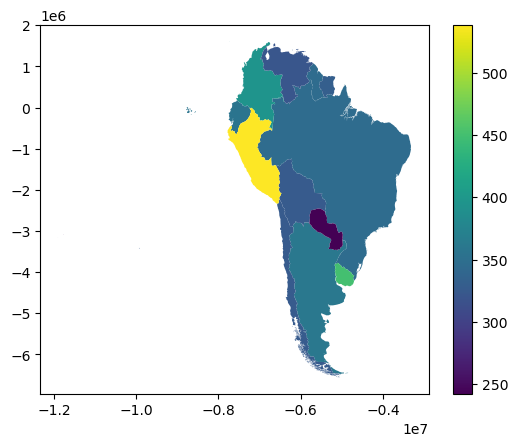

In [142]:
# Tasa de muertes por cada 100,000 habitantes
America_8857['death_rate'] = (America_8857[' deaths/1'] / America_8857['000 population']) * 100000

# Graficar coroplético de tasa de muertes
America_8857.plot(column='death_rate', legend=True, cmap="viridis")



Choropleths are great to represent normalized indicators such as:
* Densities
* Ratios
* Rates
* Averages

Population by area is a density indicator. This is a real number (not an integer), so most of the time the color gradient might  not be
that useful to reveal some pattern visually. Then, we often discretize (or bin) the indicator computed.

### Preprocessing: Discretizing

Now, we want to cut the variable. Run the next code to make sure you have tose packages:

In [166]:
## do you have these installed?
%pip show numba user mapclassify numpy

Name: mapclassify
Version: 2.10.0
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: C:\Users\david\miniforge3\Lib\site-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 2.3.0
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2025, NumPy Developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are
 met:

     * Redistributions of source code must retain the above copyright
        notice, this list of conditions and the following disclaimer.

     * Redistributions in binary form must reproduce the above
        copyright notice, this list of conditions and the following
        disclaimer in the documentation and/or other materials provide

We will discretize this:

In [144]:
America_8857['death_rate']=(America_8857[' deaths/1'] / America_8857['000 population'])

Let's explore the bining algorithms:

In [145]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=America_8857['death_rate']
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

C:\Users\david\miniforge3\Lib\site-packages\IPython\core\interactiveshell.py:3699: UserWarning: Numba not installed. Using slow pure python version.
  exec(code_obj, self.user_global_ns, self.user_ns)


How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [146]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

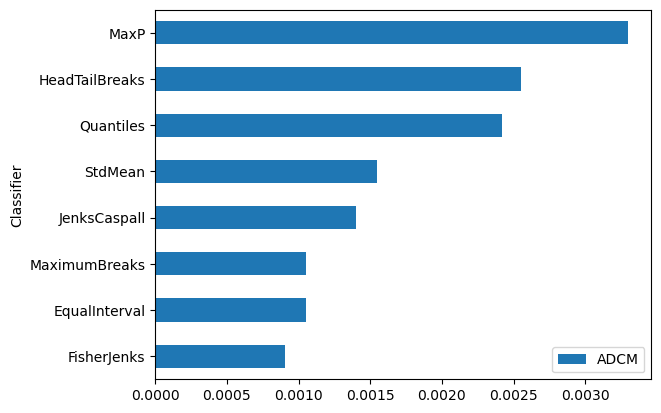

In [147]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [148]:
America_8857['death_rate_FJ5'] = fj5.yb

In [149]:
# there you are
America_8857[['death_rate','death_rate_FJ5']].head(20)

,death_rate,death_rate_FJ5
11,0.003607,2
25,0.003261,1
30,0.003458,1
43,0.003261,1
48,0.003953,2
60,0.003557,2
89,0.003458,1
151,0.003310,1
154,0.002421,0
155,0.002435,0


We could create a copy of the bins to add labels:

In [150]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

America_8857['death_rate_FJ5_cat']=America_8857.loc[:,'death_rate_FJ5'].replace(newLabelsForLevels)

# we have
America_8857[['death_rate','death_rate_FJ5','death_rate_FJ5_cat']].head(20)

,death_rate,death_rate_FJ5,death_rate_FJ5_cat
11,0.003607,2,2_Middle
25,0.003261,1,1_Low
30,0.003458,1,1_Low
43,0.003261,1,1_Low
48,0.003953,2,2_Middle
60,0.003557,2,2_Middle
89,0.003458,1,1_Low
151,0.003310,1,1_Low
154,0.002421,0,0_VeryLow
155,0.002435,0,0_VeryLow


We are ready for a discrete choropleth:

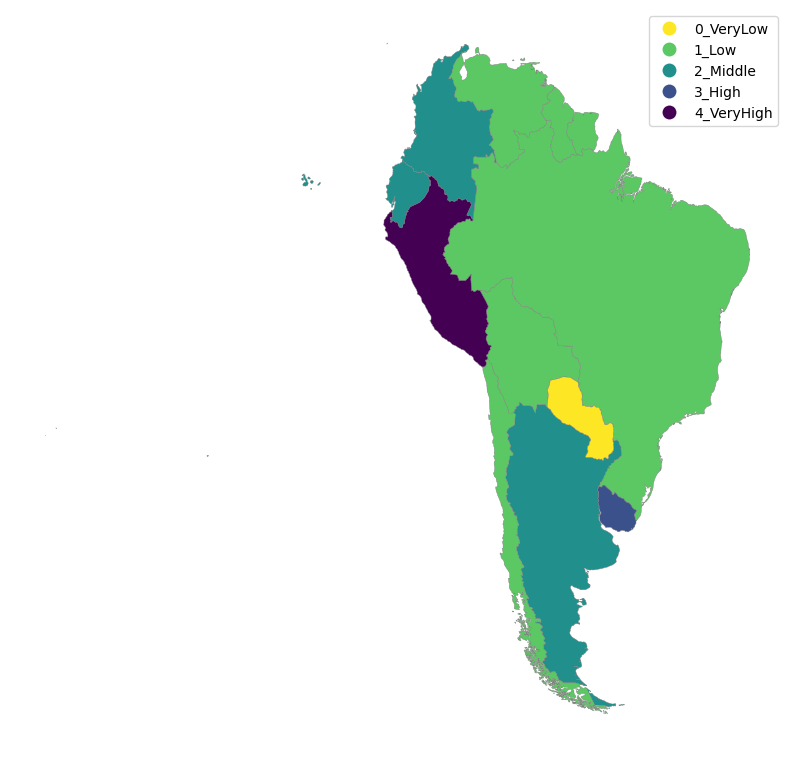

In [151]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
America_8857.plot(column='death_rate_FJ5_cat', # variable to plot
                 cmap='viridis_r', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='grey', # border color
                 linewidth=0.3, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()

# Saving

Let's save this maps for R.

In [152]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
countries
_3
_16
theMapAndData
America
America_dots
_45
America_8857
America_dots_8857
America_8857_centroids
_61
_62
America_8857_centroids_out
America_8857_centroids_no_out
_90
_119
_135
_136


These are the ones needed in R:

In [153]:
# for choropleth and base map
America_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 13 entries, 11 to 213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 13 non-null     object  
 1   geometry             13 non-null     geometry
 2   slug                 13 non-null     object  
 3    deaths/1            13 non-null     float64 
 4   000 population       13 non-null     int64   
 5   date_of_information  13 non-null     int64   
 6   ranking              13 non-null     object  
 7   region               0 non-null      float64 
 8   death_rate           13 non-null     float64 
 9   death_rate_FJ5       13 non-null     int64   
 10  death_rate_FJ5_cat   13 non-null     object  
dtypes: float64(3), geometry(1), int64(3), object(4)
memory usage: 1.2+ KB


In [154]:
# for DDMs
America_dots_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  924 non-null    geometry
dtypes: geometry(1)
memory usage: 7.3 KB


In [155]:
# for PSMs
America_8857_centroids.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 13 entries, 11 to 213
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 13 non-null     object  
 1   geometry             13 non-null     geometry
 2   slug                 13 non-null     object  
 3    deaths/1            13 non-null     float64 
 4   000 population       13 non-null     int64   
 5   date_of_information  13 non-null     int64   
 6   ranking              13 non-null     object  
 7   region               0 non-null      float64 
 8   size                 13 non-null     float64 
 9   population_outlier   13 non-null     int64   
dtypes: float64(3), geometry(1), int64(3), object(3)
memory usage: 1.1+ KB


In [156]:
# for PSMs
America_8857_centroids_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4 entries, 154 to 210
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 4 non-null      object  
 1   geometry             4 non-null      geometry
 2   slug                 4 non-null      object  
 3    deaths/1            4 non-null      float64 
 4   000 population       4 non-null      int64   
 5   date_of_information  4 non-null      int64   
 6   ranking              4 non-null      object  
 7   region               0 non-null      float64 
 8   size                 4 non-null      float64 
 9   population_outlier   4 non-null      int64   
dtypes: float64(3), geometry(1), int64(3), object(3)
memory usage: 352.0+ bytes


In [157]:
# for PSMs
America_8857_centroids_no_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 9 entries, 11 to 213
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 9 non-null      object  
 1   geometry             9 non-null      geometry
 2   slug                 9 non-null      object  
 3    deaths/1            9 non-null      float64 
 4   000 population       9 non-null      int64   
 5   date_of_information  9 non-null      int64   
 6   ranking              9 non-null      object  
 7   region               0 non-null      float64 
 8   size                 9 non-null      float64 
 9   population_outlier   9 non-null      int64   
dtypes: float64(3), geometry(1), int64(3), object(3)
memory usage: 792.0+ bytes


The file **africa_8857.gpkg** will keep all those maps as layers!

In [158]:
America_8857.to_file("america_8857.gpkg",driver='GPKG',layer='continent')
America_dots_8857.to_file("america_8857.gpkg",driver='GPKG',layer='population_ddm')
America_8857_centroids.to_file("america_8857.gpkg",driver='GPKG',layer='population_psm')
America_8857_centroids_out.to_file("america_8857.gpkg",driver='GPKG',layer='outlier_population_psm')
America_8857_centroids_no_out.to_file("america_8857.gpkg",driver='GPKG',layer='no_outlier_population_psm')